<a href="https://colab.research.google.com/github/mark47B/Matrix-Factorization-Analysis/blob/main/U%5ETDU_factorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import random

# Генерация матриц


In [2]:
def get_matrix(n=None, ):
  if n is None:
    n = random.randint(2, 400)
  A = np.random.randint(0,  65536, (n, n))
  A = A.T * A
  return A

In [ ]:
def get_matrix_3d(n=None, ):
  if n is None:
    n = random.randint(3, 400)
  A = np.random.randint(0,  65536, n)
  B = np.random.randint(0,  65536, n-1)
  M = np.diag(A, k=0) + np.diag(B, k=1)
  return M.T @ M

In [ ]:
OPERATIONS = 0

# Алгоритм $U^TDU$-факторизации

In [ ]:
A = np.array([[25, 5, 5], [5, 10, 4], [5, 4, 1]])

In [ ]:
def UDU_factorization(A: np.array):
    n = A.shape[0]
    global OPERATIONS
    OPERATIONS = 0
    U = np.empty((n, n))
    U[:] = np.nan
    D = np.empty((n, n))
    D[:] = .0
    for i in range(0, n):
        tmp = 0
        for r in range(0, i):
            OPERATIONS += 3
            tmp += U[r][i] * U[r][i] * D[r][r]
        D[i][i] = A[i][i] - tmp
        for j in range(0, n):
            tmp = 0
            for k in range(0, i):
                OPERATIONS += 3
                tmp += U[k][i] * U[k][j] * D[k][k]
            OPERATIONS += 1
            U[i][j] = ((A[i][j] - tmp) / D[i][i]) if j > i else 0

    return U + np.eye(n), D

### Проверка работоспособности алгоритма

In [ ]:
P, O = UDU_factorization(A)
print(P)
print(O)

[[1.         0.2        0.2       ]
 [0.         1.         0.33333333]
 [0.         0.         1.        ]]
[[25.  0.  0.]
 [ 0.  9.  0.]
 [ 0.  0. -1.]]


In [ ]:
np.matmul(np.matmul(P.T, O), P) - A

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

### Эксперимент

In [ ]:
dim = 200

In [ ]:
dim_operations_matrix = np.zeros((dim,))
dim_operations_matrix

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
for i in range(3, dim):
  UDU_factorization(get_matrix(i))
  dim_operations_matrix[i] = OPERATIONS

In [ ]:
x = np.arange(0, dim, 1)

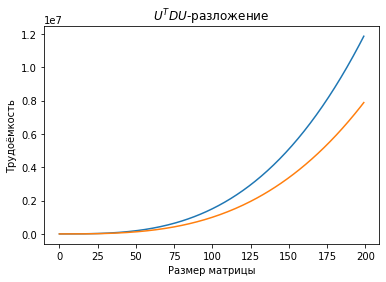

In [ ]:
plt.plot(x, dim_operations_matrix)
plt.title("$U^TDU$-разложение")
plt.xlabel("Размер матрицы")
plt.ylabel("Трудоёмкость")
plt.plot(x, x**3 )

# Алгоритм $U^TDU$-факторизации для трёхдиагональной матрицы

In [ ]:
def UDU_factorization_3diag(A: np.array):
    global OPERATIONS
    OPERATIONS = 0
    n = A.shape[0]
    U = np.empty((n-1,))
    U[:] = np.nan
    D = np.empty((n,))
    D[:] = .0
    D[0] = A[0][0]
    U[0] = A[0][1]/D[0]
    for i in range(1, n-1):
      D[i] = A[i][i] - U[i-1]*U[i-1]*D[i-1]
      U[i] = A[i][i+1] / D[i]
      OPERATIONS += 4
    D[n-1] = A[n-1][n-1] - U[n-2]*U[n-2]*D[n-2]



    return np.diag(U, k=1) + np.eye(n), np.diag(D)

### Проверка работоспособности

In [ ]:
A = get_matrix_3d(4)
A

array([[1455956649,  979528347,          0,          0],
       [ 979528347,  995649345,  650675124,          0],
       [         0,  650675124, 2263085050, 1769774417],
       [         0,          0, 1769774417, 4610073194]])

In [ ]:
P, O = UDU_factorization_3diag(A)
print(A)
print(P)
print(O)
np.matmul(np.matmul(P.T, O), P) - A

[[1455956649  979528347          0          0]
 [ 979528347  995649345  650675124          0]
 [         0  650675124 2263085050 1769774417]
 [         0          0 1769774417 4610073194]]
[[1.         0.67277302 0.         0.        ]
 [0.         1.         1.93279922 0.        ]
 [0.         0.         1.         1.76016273]
 [0.         0.         0.         1.        ]]
[[1.45595665e+09 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.36649104e+08 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00546068e+09 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.49498222e+09]]


array([[0.0000000e+00, 1.1920929e-07, 0.0000000e+00, 0.0000000e+00],
       [1.1920929e-07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]])

### Эксперимент

In [ ]:
dim = 200

In [ ]:
dim_operations_matrix = np.zeros((dim,))
dim_operations_matrix

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
for i in range(3, dim):
  UDU_factorization_3diag(get_matrix_3d(i))
  dim_operations_matrix[i] = OPERATIONS

In [ ]:
x = np.arange(0, dim, 1)

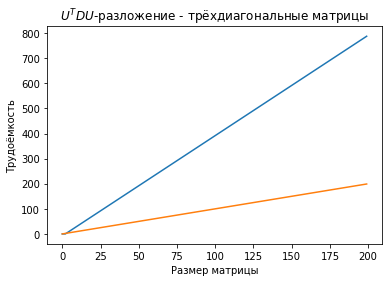

In [ ]:
plt.plot(x, dim_operations_matrix)
plt.title("$U^TDU$-разложение - трёхдиагональные матрицы")
plt.xlabel("Размер матрицы")
plt.ylabel("Трудоёмкость")
plt.plot(x, x )

# Характеристики оборудования

In [ ]:
!top

=top - 21:02:12 up 8 min,  0 users,  load average: 0.34, 0.65, 0.41
Tasks:  13 total,   1 running,  11 sleeping,   0 stopped,   1 zombie
%Cpu(s): 30.8 us,  4.4 sy,  0.0 ni, 62.1 id,  2.5 wa,  0.0 hi,  0.2 si,  0.0 st
KiB Mem : 13297228 total,  7919784 free,  1091700 used,  4285744 buff/cache
KiB Swap:        0 total,        0 free,        0 used. 12007844 avail Mem 

    PID USER      PR  NI    VIRT    RES    SHR S  %CPU %MEM     TIME+ COMMAND   
     61 root      20   0  715808  10612   4728 S   6.7  0.1   0:00.67 dap_mult+ 
     74 root      20   0  825364 203396  63968 S   6.7  1.5   3:27.03 python3   
      1 root      20   0    1008      4      0 S   0.0  0.0   0:00.58 docker-i+ 
      7 root      20   0  342124  51968  32540 S   0.0  0.4   0:01.82 node      
     18 root      20   0   35896   4724   3616 S   0.0  0.0   0:00.63 tail      
     32 root      20   0   39204   3372   1792 S   0.0  0.0   0:00.00 run.sh    
     34 root      20   0  721492  14708   7996 S   0.0  0.1   

In [ ]:
!vmstat -s

     13297228 K total memory
      1092660 K used memory
       584912 K active memory
      4553556 K inactive memory
      7918516 K free memory
       324516 K buffer memory
      3961536 K swap cache
            0 K total swap
            0 K used swap
            0 K free swap
        30330 non-nice user cpu ticks
            0 nice user cpu ticks
         4354 system cpu ticks
        62568 idle cpu ticks
         2405 IO-wait cpu ticks
            0 IRQ cpu ticks
          190 softirq cpu ticks
           43 stolen cpu ticks
      4406694 pages paged in
      1147189 pages paged out
            0 pages swapped in
            0 pages swapped out
       832295 interrupts
      1073289 CPU context switches
   1669323239 boot time
         6029 forks


In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   23G   86G  21% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.1G  910M  54% /sbin/docker-init
tmpfs           6.4G   36K  6.4G   1% /var/colab
/dev/sda1        65G   40G   25G  62% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
!cat /proc/partitions

major minor  #blocks  name

   7        0  115343360 loop0
   8        0   73400320 sda
   8        1   69048303 sda1
   8        2      16384 sda2
   8        3    2097152 sda3
   8        4      16384 sda4
   8        5    2097152 sda5
   8        6          0 sda6
   8        7          0 sda7
   8        8      16384 sda8
   8        9          0 sda9
   8       10          0 sda10
   8       11       8192 sda11
   8       12      32768 sda12
 253        0    2038784 dm-0


In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes